In [7]:
import pandas as pd
df = pd.read_csv("../../../res/car-data-preprocessed.csv")
training = pd.read_csv("../../../res/car-data-preprocessed/training.csv")
test = pd.read_csv("../../../res/car-data-preprocessed/test.csv")

X_train = training.drop(["Present_Price", "Car_Name"], axis=1)
y_train = training["Present_Price"]

X_test = test.drop(["Present_Price", "Car_Name"], axis=1)
y_test = test["Present_Price"]

In [8]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [9]:
y_prediction = LR.predict(X_test)
y_prediction[y_prediction < 0] = 0
y_prediction

array([33.79128503,  0.        , 10.62813577,  8.79691845,  9.79748868,
       25.78802567, 12.75730289,  1.79107206,  0.        ,  0.89191502,
        0.68015759, 12.13938015, 11.27803946, 13.00893664,  3.27749502,
        6.50793888,  2.51056179, 31.60358133,  5.52365346,  0.21731912,
        8.10685793,  0.96493334,  9.05874527,  8.44464413,  6.19021297,
       10.07274231, 11.58934097,  0.12117204,  8.17615095, 24.19885255,
        7.79071204,  6.63681044,  1.00809114,  5.80482659,  4.23387536,
        0.        ,  0.        , 11.01787978,  6.12760752,  2.00672588,
        6.21671054,  6.97500665, 21.80759686,  0.        ,  5.24163846,
        0.        ,  9.31805   ,  9.08499385,  1.56077537,  7.62445597,
        6.25949161,  8.12661952, 11.68532079,  0.30162276, 12.03837875,
        0.        ,  0.        ,  1.01696475, 12.53251481, 36.00074865,
        8.64973578])

In [10]:
# importing r2_score module
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error:',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error:',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.7498666669710895
mean_sqrd_error: 16.064215588554518
root_mean_squared error: 4.008018910703207


In [11]:
results = pd.DataFrame({"Actual": y_test, "Predicted": y_prediction})
results.head(10)

,Actual,Predicted
0,25.39,33.791285
1,0.54,0.000000
2,9.83,10.628136
3,9.40,8.796918
4,13.60,9.797489
5,30.61,25.788026
6,13.70,12.757303
7,1.05,1.791072
8,0.51,0.000000
9,1.90,0.891915


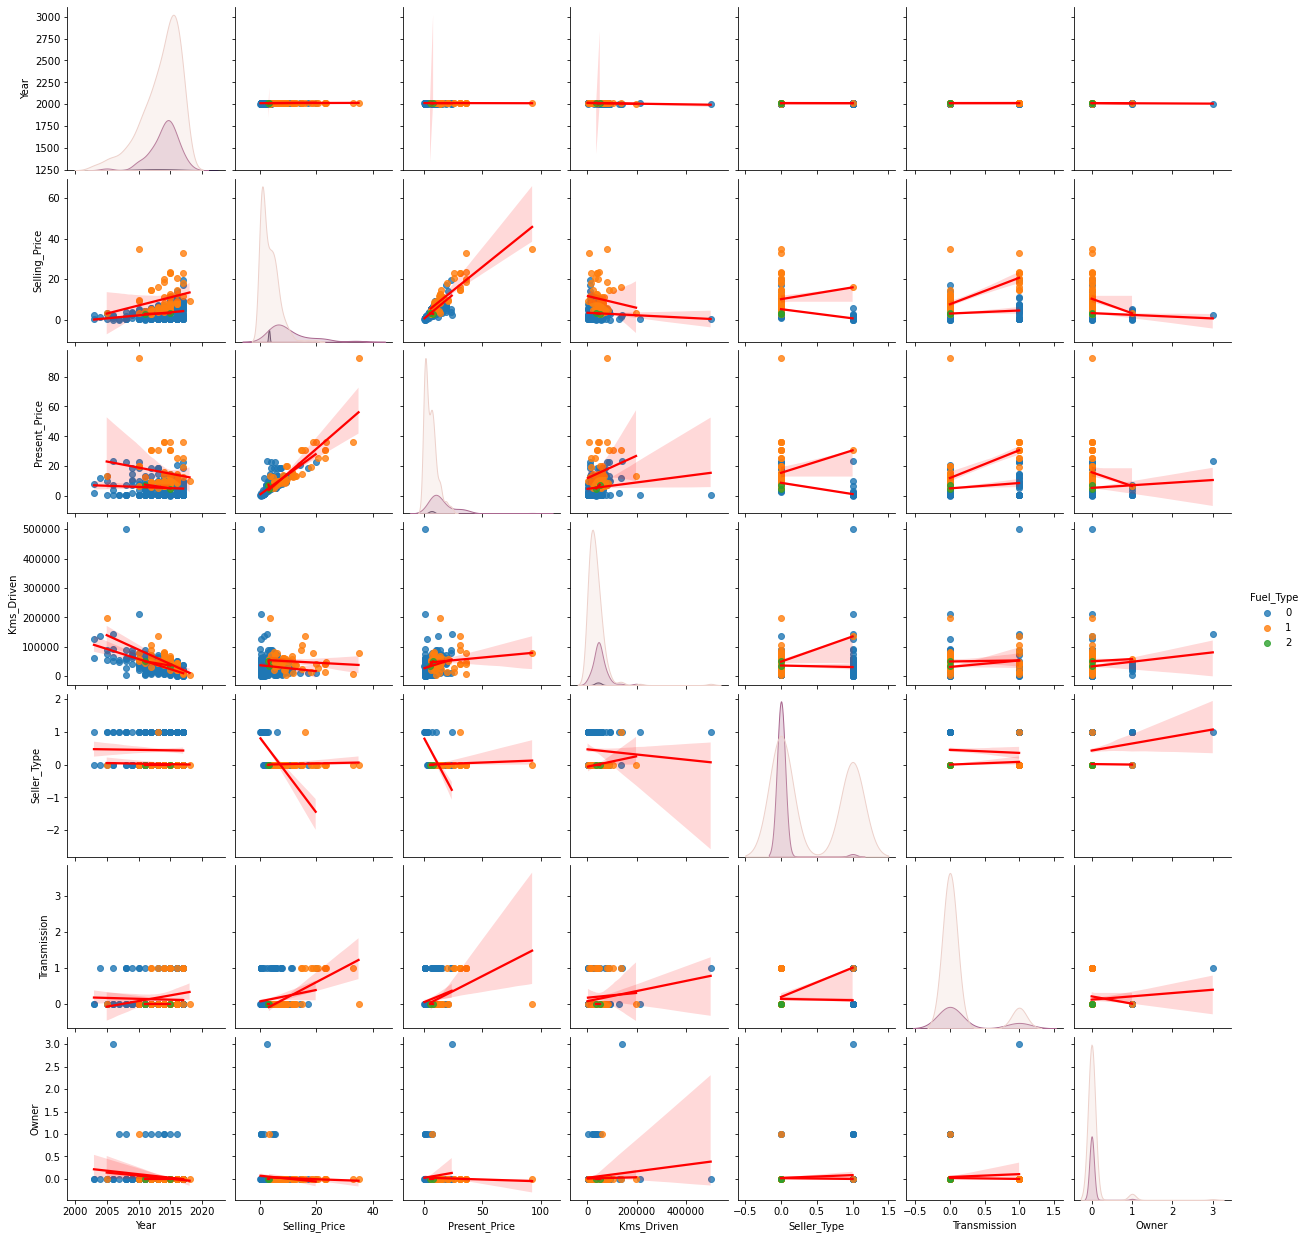

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
new_df = df.copy()

#dropping unnecessaries
new_df.drop(labels= ['Car_Name', 'Car_Name_Numerical'], axis= 1, inplace= True) 
sns.pairplot(new_df, hue= 'Fuel_Type', diag_kind= 'kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})

<AxesSubplot:>

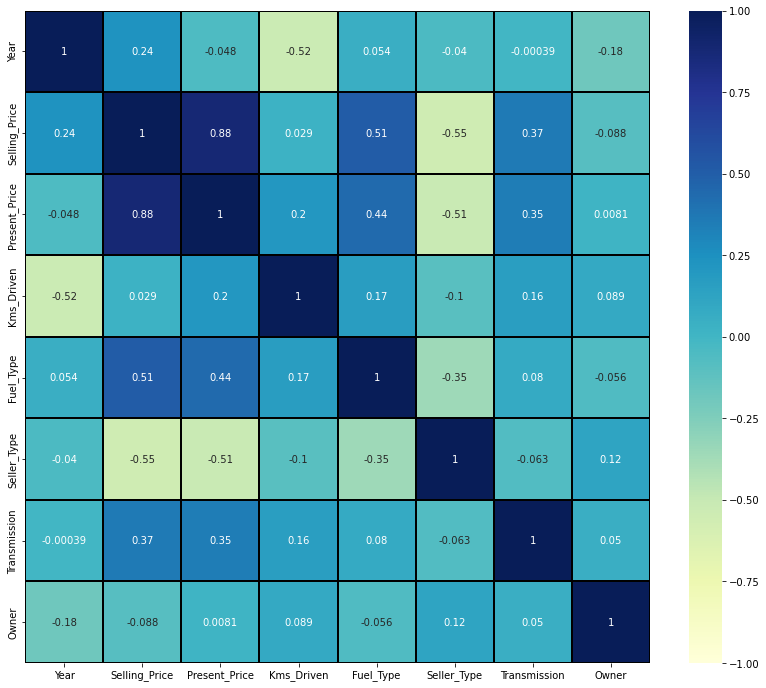

In [34]:
#HeatMap
new_df = pd.get_dummies(new_df, drop_first=True)
plt.figure(figsize=(14,12))
sns.heatmap(new_df.corr(), annot= True, cmap= 'YlGnBu', vmin= -1 , vmax= 1, linecolor='black', linewidths=2)